In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('telecom.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
dataset.shape

(10000, 14)

In [6]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

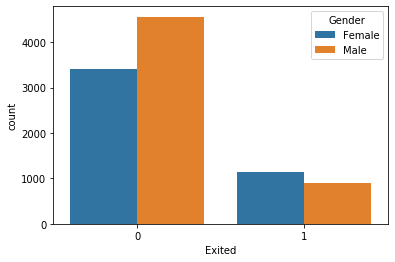

In [7]:
sns.countplot(x='Exited',hue='Gender',data=dataset)

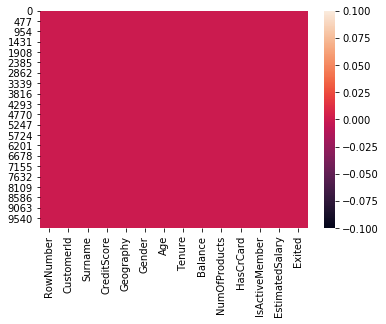

In [8]:
sns.heatmap(dataset.isnull())

In [9]:
dataset.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
dataset=dataset.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [11]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
lb1=LabelEncoder()

In [14]:
lb2=LabelEncoder()

In [15]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
dataset['Gender']=lb1.fit_transform(dataset['Gender'])
dataset['Geography']=lb2.fit_transform(dataset['Geography'])

In [17]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [18]:
dataset['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [19]:
dataset['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

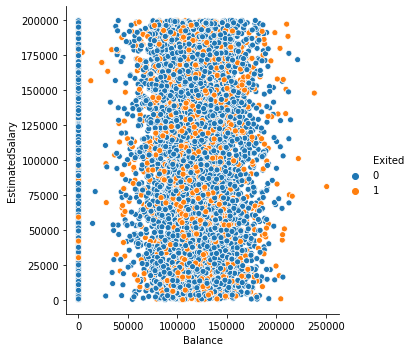

In [20]:
sns.relplot(x='Balance',y='EstimatedSalary',hue='Exited',data=dataset)

In [21]:
data_in=dataset.iloc[:,:-1]
data_in

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [22]:
data_out=dataset.iloc[:,-1]
data_out

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [23]:
print(data_in.shape)
print(data_out.shape)

(10000, 10)
(10000,)


In [24]:
sc=MinMaxScaler(feature_range=(0,1))

In [25]:
data_in=sc.fit_transform(data_in)

In [26]:
data_in

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

In [29]:
keys=dataset.keys()[:-1]

In [30]:
keys

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [31]:
dici={}
for i in range(len(keys)):
    dici.update({keys[i]:data_in[:,i]})

In [32]:
final_data=pd.DataFrame(dici)
final_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [33]:
final_data=pd.concat([dataset.iloc[:,-1],final_data],axis=1)

In [34]:
final_data.head()

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,1,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,0,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [35]:
train,test=train_test_split(final_data,test_size=0.2)

In [36]:
print(train.shape)
print(test.shape)

(8000, 11)
(2000, 11)


In [37]:
import boto3,re,os,json,sagemaker
from sagemaker import get_execution_role

In [38]:
role=get_execution_role()
print(role)

arn:aws:iam::846319470919:role/service-role/AmazonSageMaker-ExecutionRole-20200910T165326


In [39]:
my_region=boto3.session.Session().region_name
print(my_region)

us-east-1


In [40]:
containers = {'us-west-2': '433757028032.dkr.ecr.us-west-2.amazonaws.com/xgboost:latest',
              'us-east-1': '811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest',
              'us-east-2': '825641698319.dkr.ecr.us-east-2.amazonaws.com/xgboost:latest',
              'eu-west-1': '685385470294.dkr.ecr.eu-west-1.amazonaws.com/xgboost:latest'}

In [41]:
print(containers[my_region])

811284229777.dkr.ecr.us-east-1.amazonaws.com/xgboost:latest


In [42]:
prefix='sagemaker/Telecom'
bucket_name='buildathonproject1'

In [43]:
final_data.to_csv('train.csv',index=False,header=False)
boto3.Session().resource('s3').Bucket(bucket_name).Object(os.path.join(prefix,'train/train.csv')).upload_file('train.csv')
s3_input_train=sagemaker.s3_input(s3_data='s3://{}/{}/train'.format(bucket_name, prefix),content_type='csv')

's3_input' class will be renamed to 'TrainingInput' in SageMaker Python SDK v2.


In [44]:
sess=sagemaker.Session()
telecom_model=sagemaker.estimator.Estimator(containers[my_region],role,train_instance_count=1,train_instance_type='ml.m5.large',output_path='s3://{}/{}/output'.format(bucket_name,prefix),sagemaker_session=sess)
telecom_model.set_hyperparameters(max_depth=5,eta=0.2,gamma=4,min_child_weight=6,subsample=0.8,silent=0,objective='binary:logistic',num_round=100)

Parameter image_name will be renamed to image_uri in SageMaker Python SDK v2.


In [45]:
telecom_model.fit({'train':s3_input_train})

2020-09-30 07:50:56 Starting - Starting the training job...
2020-09-30 07:50:59 Starting - Launching requested ML instances......
2020-09-30 07:52:21 Starting - Preparing the instances for training......
2020-09-30 07:53:12 Downloading - Downloading input data...
2020-09-30 07:53:48 Training - Downloading the training image..Arguments: train
[2020-09-30:07:54:03:INFO] Running standalone xgboost training.
[2020-09-30:07:54:03:INFO] Path /opt/ml/input/data/validation does not exist!
[2020-09-30:07:54:03:INFO] File size need to be processed in the node: 0.99mb. Available memory size in the node: 172.35mb
[2020-09-30:07:54:03:INFO] Determined delimiter of CSV input is ','
[07:54:03] S3DistributionType set as FullyReplicated
[07:54:03] 10000x10 matrix with 100000 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[07:54:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 6 pruned nodes, max_depth=5
[0]#011train-error:0.1448
[07:54:03]

In [46]:
detector=telecom_model.deploy(initial_instance_count=1,instance_type='ml.m5.large')

Parameter image will be renamed to image_uri in SageMaker Python SDK v2.


--------------!

In [47]:
detector.endpoint

'xgboost-2020-09-30-07-50-56-779'

In [48]:
from sagemaker.predictor import csv_serializer

In [50]:
test_data_array=test.drop('Exited',axis=1).values #load the data into an array
detector.content_type = 'text/csv' # set the data type for an inference
detector.serializer = csv_serializer # set the serializer type
print(type(test_data_array))
print(test_data_array.shape)
predictions=detector.predict(test_data_array).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array
print(predictions_array.shape)

<class 'numpy.ndarray'>
(2000, 10)
(2000,)


In [51]:
print(predictions)

0.357669651508,0.141457110643,0.329746335745,0.026482027024,0.0712991580367,0.0263096913695,0.0375938378274,0.0215682908893,0.0678913518786,0.115104779601,0.414443165064,0.015394564718,0.0659468099475,0.983116984367,0.564640462399,0.767752766609,0.211881354451,0.0556389167905,0.266310662031,0.0520670227706,0.0255261678249,0.0819280520082,0.121003270149,0.0237068850547,0.0298531763256,0.400649666786,0.0279733166099,0.645623505116,0.144340574741,0.773866117001,0.0724500715733,0.0210663992912,0.660542488098,0.312410950661,0.805181801319,0.835865318775,0.0263171419501,0.255656123161,0.150213211775,0.17395016551,0.308814823627,0.0194727368653,0.290218800306,0.0748643428087,0.0298329666257,0.0253355037421,0.0449019707739,0.259558230639,0.0533759184182,0.781935751438,0.0273960605264,0.157540291548,0.0343550741673,0.335181176662,0.0296571981162,0.091909609735,0.0141892451793,0.157416403294,0.0391214042902,0.450152218342,0.292664647102,0.0937503576279,0.0576719790697,0.0443506836891,0.037342704